<a href="https://colab.research.google.com/github/schumbar/CMPE297/blob/main/assignment_05/ShawnChumbar_Assignment05_PartC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05 Part C - Anomaly Detection of Time-Series using TimeGPT

## Assignment Description
Create a Colab for performing anomaly detection in time series data using TimeGPT. Include clear, detailed explanations of the methodology and code.

### References
1. [Nixtla's Anomaly Detection Tutorial](https://docs.nixtla.io/docs/tutorials-anomaly_detection)


### Import Necessary Libraries

In [1]:
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.7 MB/s eta 0:00:00


In [2]:
from nixtla.utils import in_colab
import pandas as pd
from nixtla import NixtlaClient
from google.colab import userdata
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
IN_COLAB = in_colab()

In [4]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

## Load Dataset

In [5]:
import pandas as pd
from datetime import datetime

In [6]:
def convert_date_to_readable_format(timestamp_col):
    return timestamp_col.apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d'))

In [7]:
data_url = 'https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/refs/heads/main/datasets/usdeur.csv'

In [8]:
# Import necessary libraries
import pandas as pd
from datetime import datetime

# Function to convert timestamp to readable date format
def convert_date_to_readable_format(timestamp_col):
    # Ensure that the input is in milliseconds and convert it to datetime
    return timestamp_col.apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d') if pd.notnull(x) else x)

# Load your dataset (assuming 'df' is your DataFrame)
df = pd.read_csv(data_url)  # Replace with actual file path or dataset loading method

# Check if the 'timestamp' column needs conversion from datetime to timestamp (in milliseconds)
if pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    df['timestamp'] = (df['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(milliseconds=1)

# Apply the conversion function to modify the timestamp column in place
df['timestamp'] = convert_date_to_readable_format(df['timestamp'])

# Display the modified dataset
print(df.head())
df.dtypes

# Note: Ensure that the column 'timestamp' is in Unix format (milliseconds since epoch).
# If the column is already a datetime type, you may need to adjust the logic accordingly.


    timestamp   value
0  2007-01-01  0.7537
1  2007-01-02  0.7537
2  2007-01-03  0.7559
3  2007-01-04  0.7631
4  2007-01-05  0.7644


,0
timestamp,object
value,float64


In [9]:
df.rename(columns={'timestamp': 'ds', 'value': 'y'}, inplace=True)
df.head()

,ds,y
0,2007-01-01,0.7537
1,2007-01-02,0.7537
2,2007-01-03,0.7559
3,2007-01-04,0.7631
4,2007-01-05,0.7644


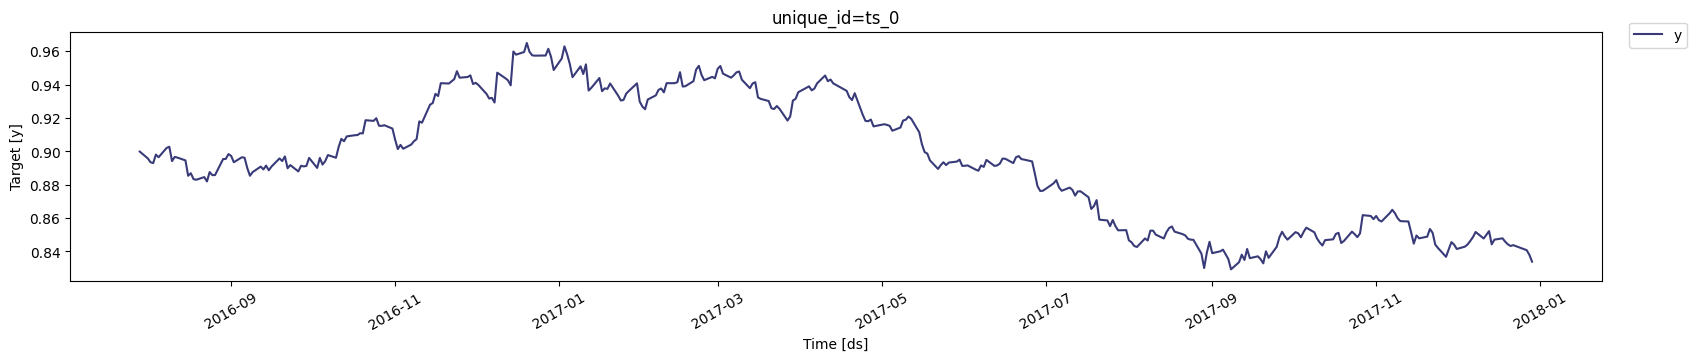

In [10]:
nixtla_client.plot(df, max_insample_length=365)

## Anomaly Detection

In [11]:
anomalies_df = nixtla_client.detect_anomalies(df, freq='D')
anomalies_df.head()

,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,2007-02-08,0.7699,0.770902,0.797964,0.743839,False
1,2007-02-09,0.7689,0.770375,0.797437,0.743312,False
2,2007-02-12,0.7719,0.768843,0.795906,0.741780,False
3,2007-02-13,0.7680,0.768858,0.795920,0.741795,False
4,2007-02-14,0.7645,0.770384,0.797446,0.743321,False


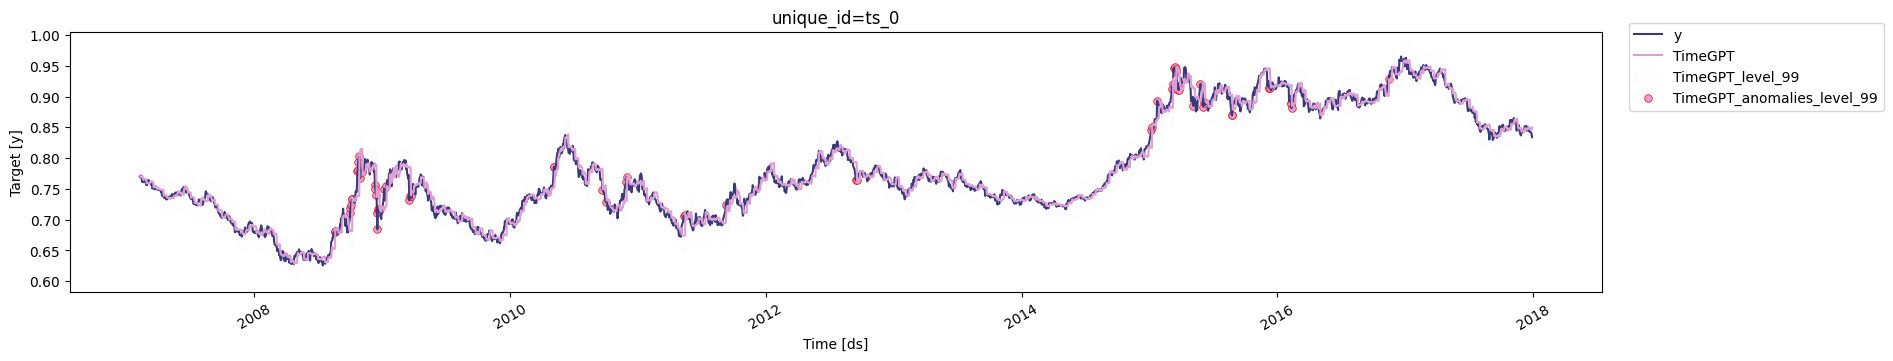

In [12]:
nixtla_client.plot(df, anomalies_df)

## Anomaly Detection with Exogenous Features

In [13]:
anomalies_df_x = nixtla_client.detect_anomalies(
    df,
    freq='D',
    date_features=['month', 'year'],
    date_features_to_one_hot=True,
)

<Axes: ylabel='features'>

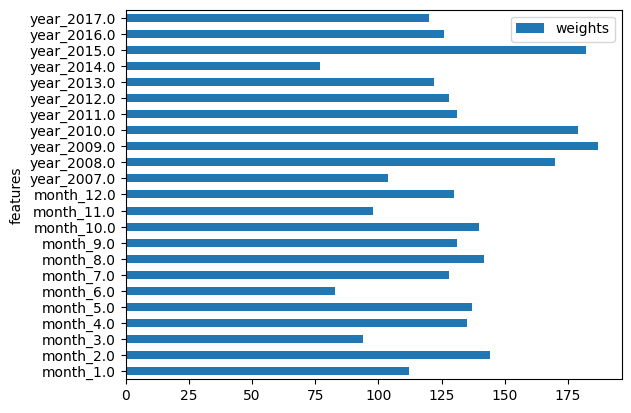

In [14]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')

## Modifying the Confidence Intervals

In [15]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    freq='D',
    level=70
)

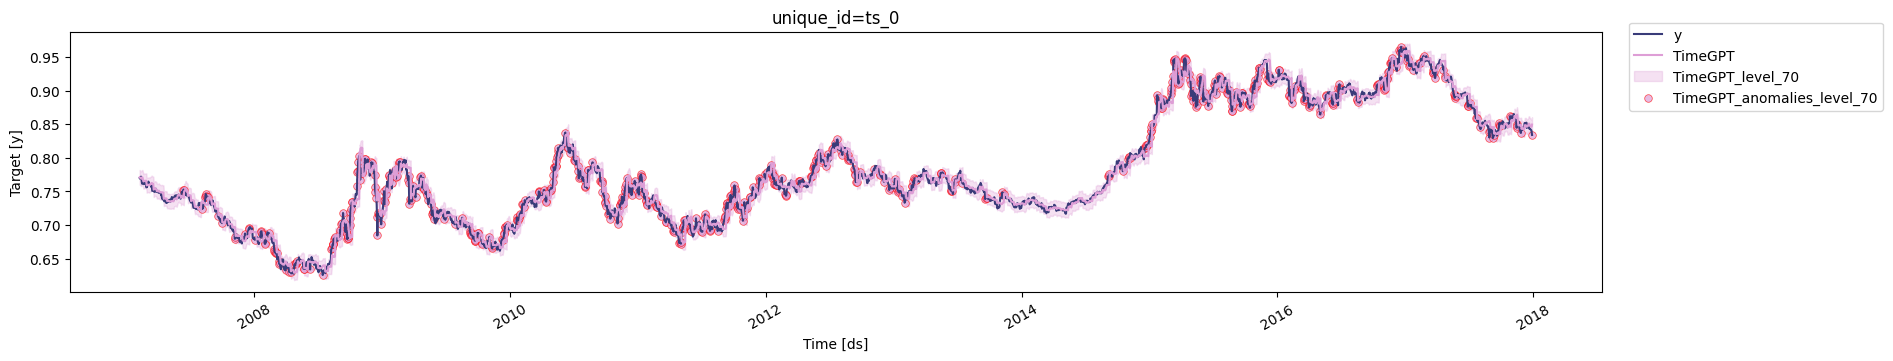

In [16]:
nixtla_client.plot(df, anomalies_df)